# Student's t distribution

For more information, see chapters 9 and 12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

Student's t distribution is defined as an ensamble of normal distributions "weighted" by precision terms $\tau$ that are Gamma-distributed. That is

$$
\begin{aligned}
    p(x|\mu, \alpha, \beta) &= \int_0^\infty \mathcal{N}\left(x |\mu, \tau^{-1}\right)\text{Gam}(\tau|\alpha, \beta) \ d\tau \\
    &= \frac{\beta^\alpha}{\Gamma(\alpha)}\left(\frac{1}{2\pi}\right)^{1/2}\left[b + \frac{(x - \mu)^2}{2}\right]^{-a - 1/2} \Gamma\left(a + \frac{1}{2}\right)
\end{aligned}
$$

Defining $\nu = 2\alpha$, $\lambda = \alpha/\beta$ and rearranging, we obtain the final form of the distribution in the form

$$
    \text{St}(x\vert\mu,\lambda,\nu) = \frac{\Gamma(\nu/2 + 1/2)}{\Gamma(\nu/2)}\left(\frac{\lambda}{\pi\nu}\right)^{1/2}\left[1 + \frac{\lambda(x - \mu)^{-\nu/2 - 1/2}}{\nu}\right]
$$

* $\nu$ is known as the degrees of freedom of the distribution;
* $\lambda$ is known as the precision of the distribution

In [3]:
def students(x, mu, lmbda, nu):
    """
    Generates a function that returns the value
    of the pdf of a Student's-t distribution
    
    Parameters
    ----------
    x: float, np.array
        Values to evaluate the pdf at
    mu: float
        The mean of the distribution
    lmbda: float
        The precision of the distribution
    nu: float
        The degrees of freedom of the distributino
    """
    const = gamma(nu / 2 + 1 / 2) / gamma(nu / 2) * np.sqrt(lmbda / (np.pi * nu))
    pdf = const * (1 + (lmbda * (x - mu) ** 2) / nu) ** (-nu / 2 - 1 / 2)
    return pdf

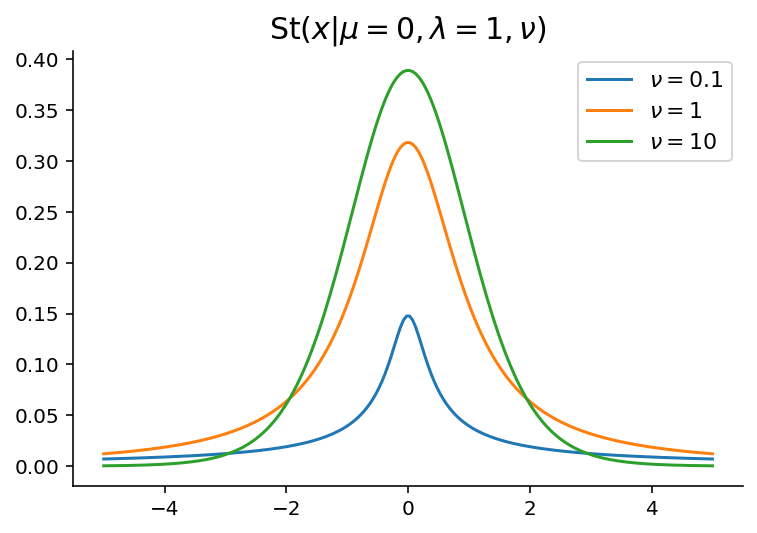

In [4]:
mu, lmbda= 0, 1

xrange = np.linspace(-5, 5, 200)

nus = [0.1, 1, 10]
for nu in nus:
    pdf = students(xrange, mu, lmbda, nu)
    plt.plot(xrange, pdf, label=rf"$\nu={nu}$");
plt.title(r"$\mathrm{St}"rf"(x\vert\mu={mu}, \lambda={lmbda}, \nu)$", fontsize=15)
plt.legend(fontsize=11);

## Estimating the value of a digamma

In [5]:
from scipy.special import digamma

In [87]:
def bisection(f, x_low, x_up, tol=1e-5, max_its=1000):
    diff = np.inf
    nits = 0
    while diff > tol:
        if nits >= max_its:
            raise ValueError("Root searching did not converge")
            
        x_mid = (x_low + x_up) / 2
        f_mid = f(x_mid)

        if np.sign(f_mid) == 1:
            x_up = x_mid
        else:
            x_low = x_mid

        diff = np.abs(f_mid)
        nits += 1
        
    return x_mid

def inverse_digamma(k, x_low=0.1, x_up=100, **kwargs):
    f = lambda x: digamma(x) - k
    return bisection(f, x_low, x_up, **kwargs)

In [85]:
k = digamma(5)
k

1.5061176684318003

In [86]:
inverse_digamma(k)

5.000032806396485

In [77]:
inverse_digamma(3)

20.583464032411577

### Student's-t $a$ parameter estimation

To take an $M$-step in estimating the parameters of student's-t distribution, we require to satisfy the equality

$$
    \log a - \psi(a) = \frac{1}{N}\big(N \log\mathbb{E}[\tau] - \mathbb{E}[\log\tau]\big)
$$

More generally, we would like to find $a \in\mathbb{R}$ that satisfies

$$
   \big(\log a - \psi(a)\big) - b = 0
$$

for any given $b\in\mathbb{R}$

In [90]:
a = 3
b = np.log(3) - digamma(3)
b

0.17582795356964265

In [141]:
def a_estimation(b, x_low=0.1, x_up=10, **kwargs):
    f = lambda x: (np.log(x) - digamma(x)) - b
    a_est = bisection(f, x_low, x_up, **kwargs)
    return a_est

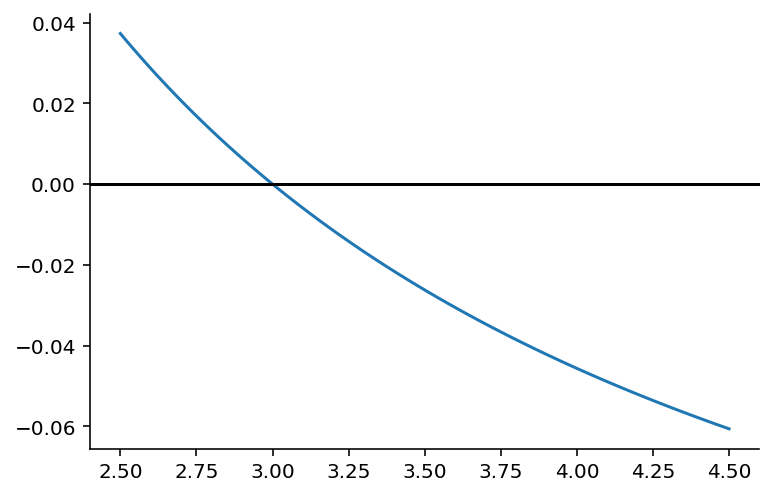

In [136]:
xrange = np.linspace(2.5, 4.5, 100) 
plt.plot(xrange, np.log(xrange) - digamma(xrange) - b)
plt.axhline(y=0, c="black")

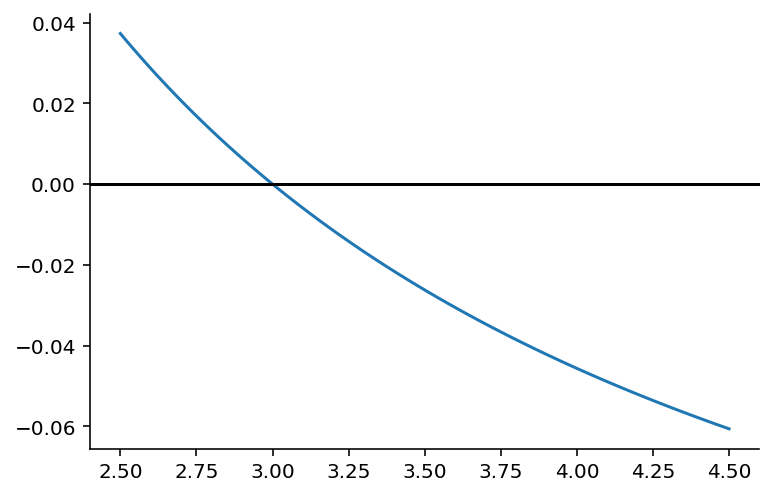

In [158]:
xrange = np.linspace(2.5, 4.5, 100) 
plt.plot(xrange, np.log(xrange) - digamma(xrange) - b)
plt.axhline(y=0, c="black")

In [155]:
a_estimation(b, x_low=2, x_up=4)

3.0